<h1><center>'Interpretation of Machine Learning Models'</center></h1>
<h3><center>An approach to deep dive into black-box models</center></h3>

   ***Author: Mayank Singh***

<img src="images/download.jpg" alt="HTML5 Icon" style="width:200px;height:300px;">

<b><center>"So you have chosen me as your study partner! Okay, let's learn together."</center></b>

# Table of Contents
* [Why do we need Interpretable Machine Learning?](#chapter_parent)
* [1. Importing Libraries](#chapter1)
* [2. Loading Data](#chapter2)
* [3. Data Preprocessing](#chapter3)
    * [3.1 Check for Null Values](#section_3_1)
* [4. Exploratory Data Analysis](#chapter4)
    * [4.1 Check distribution of the target variable](#section_4_1)
    * [4.2 Check correlation among features](#section_4_2)
    * [4.3 Check variation of features with target variable](#section_4_3)
* [5. Data Preparation](#chapter5)
* [6. Fitting Model](#chapter6)
* [7. Model Evaluation](#chapter7)
* [8. Model Interpretation](#chapter8)
    * [8.1. SHAP Plots](#section_8_1)
    * [8.2. PDP Plots](#section_8_2)
    * [8.3. ALE Plots](#section_8_3)
    * [8.4. ICE Plots](#section_8_4)
    * [8.5. LIME Plots](#section_8_5)
* [9. Summary](#chapter9)

# Why do we need Interpretable Machine learning?<a class="anchor" id="chapter_parent"></a>

<img src="images/images (1).jpg" alt="HTML5 Icon" style="width:300px;height:300px;">

***“If you can’t explain it simply, you don’t understand it well enough.”***

***– Albert Einstein***

Before we proceed, I would highly recommend the book -  **‘Interpretable Machine Learning’, Christoph Molnar** that beautifully encapsulates the essence of ML interpretability. I have used many portions from this book in this notebook to explain concepts.

Being a practicing Data Scientist, the curiosity to know whats in front of you comes naturally. It could be the sudden urge to know the recipe behind that delicacy you enjoy or the reason behind why your machine learning model gives the outputs you get.

Here is a big picture of explainable machine learning. As you can see here, we capture the world by collecting raw data and use that data to make further predictions using machine learning models. In the heirarchy illustrated below, **Interpretability** is just another layer on the model that helps humans to understand the process.

<img src="images/Capture.JPG" alt="HTML5 Icon" style="width:400px;height:600px;">

I will try explaining a model's prediction using **Global and Local Interpretation** methods.

Global Interpretation methods include: 
    1. SHAP (SHapley Additive exPlanations) Plots
    2. PDP Partial Dependency Plots
    3. Accumulated Local Effects (ALE) Plots
    
Local Interpretation methods include:
    1. Individual Conditional Expectation (ICE) Plots
    2. Local interpretable model-agnostic explanations (LIME) Plot 

Before interpreting a model, we need to load a dataset, perform data pre-processing, exploratory data analysis, 
train a model and get the model evaluation metrics. ***So, I am assuming that you already have a basic understanding 
of above-mentioned concepts.*** We will not go deep into these concepts as the scope of this note book is to cover model interpretability.

Now, let’s get our hands dirty and dive deep into our models.

**LET’S CODE!!**


<b>Please install these libraries/packages before you try to run the codes in this notebook.</b>
    1.  numpy
    2.  pandas
    3.  sklearn
    4.  seaborn
    5.  matplotlib
    6.  shap
    7.  pdpbox
    8.  alepython (install git before installing alepython)
    9.  pycebox
    10. lime

# 1. Importing Libraries <a class="anchor" id="chapter1"></a>

In [1]:
# importing libraries 

import numpy as np
import pandas as pd  

from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
import matplotlib as mpl

import shap
from pdpbox import pdp
from mpl_toolkits.mplot3d import Axes3D
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence
from alepython import ale_plot
from pycebox.ice import ice, ice_plot
import lime
import lime.lime_tabular

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline



# 2. Loading Data <a class="anchor" id="chapter2"></a>

<b>I am using the 'Boston Housing' dataset that can be easily imported using sklearn library.</b>

<b>Data Description:</b>

1. CRIM: Per capita crime rate by town

2. ZN: Proportion of residential land zoned for lots over 25,000 sq. ft

3. INDUS: Proportion of non-retail business acres per town

4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

5. NOX: Nitric oxide concentration (parts per 10 million)

6. RM: Average number of rooms per dwelling

7. AGE: Proportion of owner-occupied units built prior to 1940

8. DIS: Weighted distances to five Boston employment centers

9. RAD: Index of accessibility to radial highways

10. bTAX: Full-value property tax rate per $10,000. 

11. PTRATIO: Pupil-teacher ratio by town

12. B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town

13. LSTAT: Percentage of lower status of the population

14. MEDV: Median value of owner-occupied homes in $1000s

In [2]:
# load dataset
boston_dataset = load_boston()

In [3]:
# creating a dataframe with all features along with 
# the target variable 'MEDV' which is price 

boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

# 3. Data Preprocessing <a class="anchor" id="chapter3"></a>

### 3.1 Check for Null Values <a class="anchor" id="section_3_1"></a>

In [4]:
# checking for any Null values
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

# 4. Exploratory Data Analysis <a class="anchor" id="chapter4"></a>

### 4.1  Check distribution of the target variable <a class="anchor" id="section_4_1"></a>

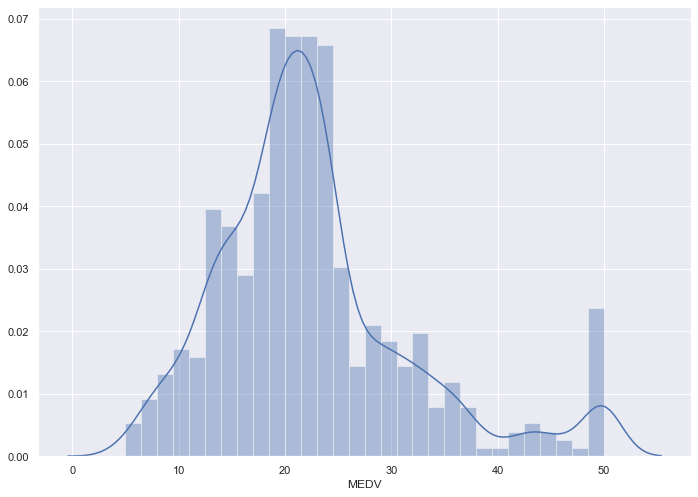

In [5]:
#checking the distribution of target variable
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

### 4.2 Check correlation among features <a class="anchor" id="section_4_2"></a>

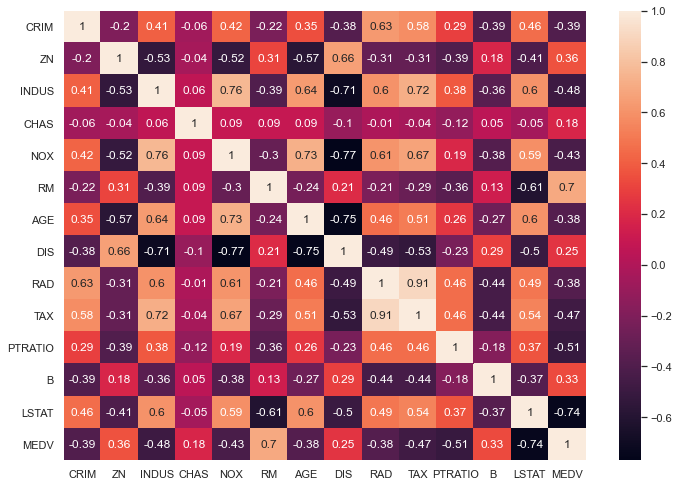

In [6]:
#plotting a correlation matrix
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True);

Based, on correlation with target variable we will go forward with **four** features: **LSTAT, RM, PTRATIO and INDUS**

### 4.3 Check variation of features with target variable <a class="anchor" id="section_4_3"></a>

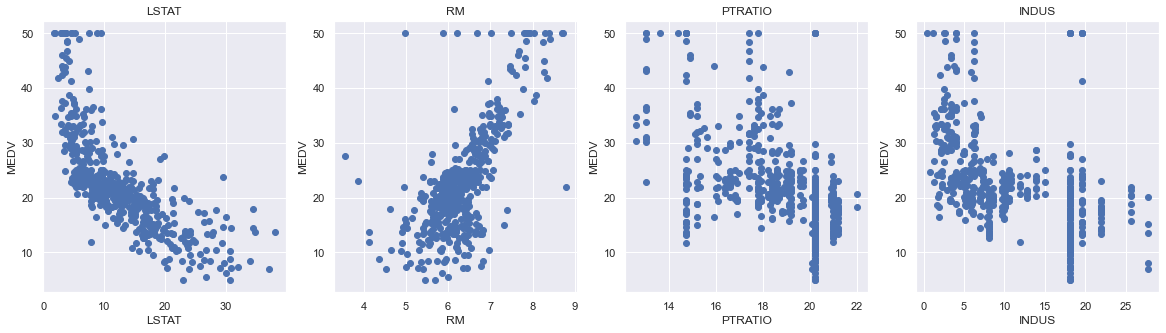

In [7]:
# checking variation of features with target variable using scatter plots
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM', 'PTRATIO', 'INDUS']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

# 5. Data Preparation <a class="anchor" id="chapter5"></a>

In [8]:
# creating two dataframes having features and target variable repectively
X = boston[features]
y = boston['MEDV']

### Train and Test Split

In [9]:
# splitting the data into train and test using train_test_split() from sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 4)
(102, 4)
(404,)
(102,)


# 6. Fitting Model <a class="anchor" id="chapter6"></a>

In [10]:
# define the model
model = RandomForestRegressor(n_estimators = 300, random_state = 0)
# fit the model on the whole dataset
model.fit(X_train, y_train)
# make prediction
y_pred = model.predict(X_test)

# 7. Model Evaluation <a class="anchor" id="chapter7"></a>

In [11]:
# model evaluation for testing set
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)

print("The model performance for testing set:")
print("_______________________________________\n")
print("MAE is {}".format(mean_absolute_error(y_test, y_pred)))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set:
_______________________________________

MAE is 2.4919640522875794
RMSE is 3.4127189584761424
R2 score is 0.8512444092713966


In [12]:
# Create traces
fig = go.Figure()
index = []
for i in range(1,X_test.shape[0]+1):
    index.append(i)

fig.add_trace(go.Scatter(x=index, y=y_pred,
                    mode='lines+markers',
                    name='Predicted Price'))
fig.add_trace(go.Scatter(x=index, y=y_test,
                    mode='markers', 
                    name='Actual Price'))

# Edit the layout
fig.update_layout(title='Actual vs. Predicted Price Trend',
                   xaxis_title='Row_number',
                   yaxis_title='Price')

# 8. Model Interpretation <a class="anchor" id="chapter8"></a>

_**Model interpretability**_ tries to understand and explain the steps and decision a machine learning model takes when making predictions. It gives us the ability to question the model’s decision and learn about the following aspects.

**1.	What features/attributes are important to the model?**<br>
•	You should be able to extract information about what features are important as well as how features interact to create powerful information.

**2.	Why did the model come to this conclusion?**<br>
•	You should also have the ability to extract information about specific predictions in order to validate and justify why the model produced a certain result.


## 8.1 SHAP (SHapley Additive exPlanations) Plots <a class="anchor" id="section_8_1"></a>

•	The goal of SHAP is to explain the prediction of an instance x by computing the contribution of each feature to the prediction. SHAP uses shapley values to explain feature’s contribution for a prediction.

•	The Shapley value is the average marginal contribution of a feature value across all possible coalitions.

•	SHAP comes with many global interpretation methods based on aggregations of Shapley values.

•	In this notebook, we will first see the summary of the effects of all the features over the whole dataset. We also call it a feature importance plot.

•	Then, we will move on to feature dependence plots, SHAP feature dependence might be the simplest global interpretation plot: 1) Pick a feature. 2) For each data instance, plot a point with the feature value on the x-axis and the corresponding Shapley value on the y-axis. 3) Done

•	We will also see how a feature is interacting with the other features as well. If you look the code where we are plotting this plot, you might get confused as you would I have used only feature ‘RM’ as input. Actually, shap dependence plot takes the most interacting feature with the feature we want to analyse on its own. So, here you can see ‘LSTAT’ is interacting the most with ‘RM’ for predicted outputs. (You can experiment and observe interaction among other features)

•	At last, we will use Shapley values for local interpretation of model. We will pick an instance, here I have taken instance number 35, and see how each feature has influenced the prediction to give the final output given by the model. Here, we can also see whether a feature is negatively or positively affecting the model prediction.


1. Summarizing the effects of all the features

Feature Importance Plot:


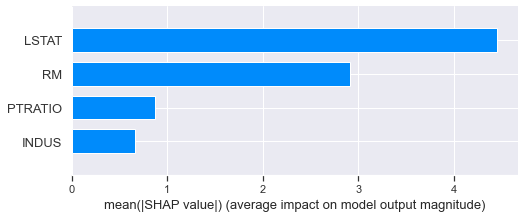


Plotting the SHAP values of every feature for every sample:


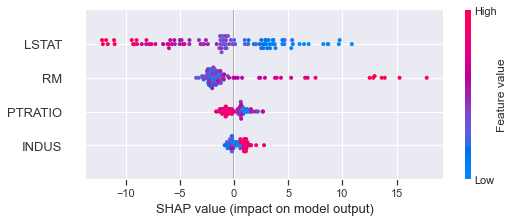

2. Summarizing the effect of each features (Dependence Plot) using one feature


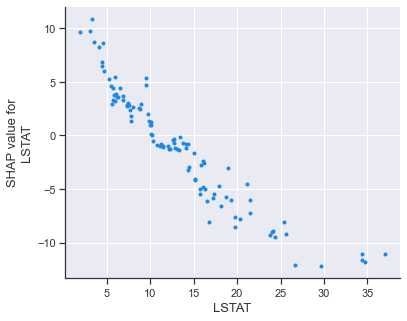

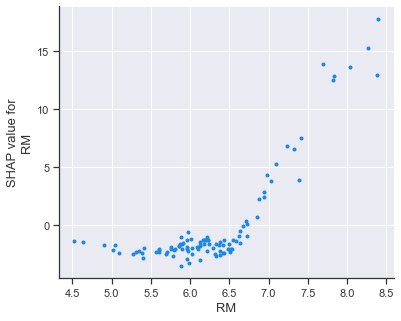

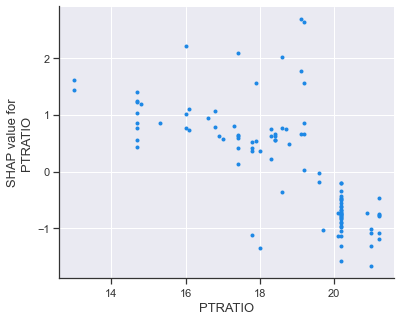

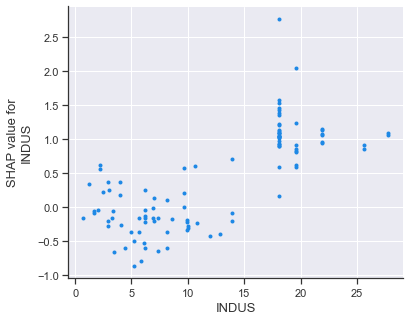

3. Summarizing the effect of features (Dependence Plot) using two features


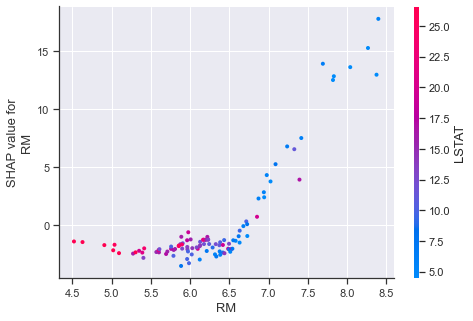

4. Visualizing an instance:


In [22]:
# load JS visualization code to notebook
shap.initjs()

#explain the model's predictions using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# summarize the effects of all the features
print("\033[1m" + "1. Summarizing the effects of all the features" + "\033[0m")
print("\nFeature Importance Plot:")
shap.summary_plot(shap_values, X_test, plot_type="bar")
print("\nPlotting the SHAP values of every feature for every sample:")
shap.summary_plot(shap_values, X_test)


# summarize the effects of each feature
print("\033[1m" + "2. Summarizing the effect of each features (Dependence Plot) using one feature" + "\033[0m")
for feat in features:
    shap.dependence_plot(feat, shap_values, X_test, interaction_index=None)
    
# summarize the effects of each feature   
print("\033[1m" + "3. Summarizing the effect of features (Dependence Plot) using two features" + "\033[0m")
shap.dependence_plot('RM', shap_values, X_test)
    

# load JS visualization code to notebook
shap.initjs()

# visualize the 10th prediction's explanation 
print("\033[1m" + "4. Visualizing an instance:" + "\033[0m")
shap.force_plot(explainer.expected_value, shap_values[35,:], X_test.iloc[35,:])


## 8.2 Partial Dependency Plots (PDP)  <a class="anchor" id="section_8_2"></a>

•	The partial dependence plot (PDP plot) shows the marginal effect one or two features have on the predicted outcome of a machine learning model.

•	A partial dependence plot can show whether the relationship between the target and a feature is linear, monotonic or more complex. For example, when applied to a linear regression model, partial dependence plots always show a linear relationship.

•	We first look at the PDP plots for each feature then move on to dependency where we consider two features at a time using a cool 3-D plot



#### Dependency plot using one feature

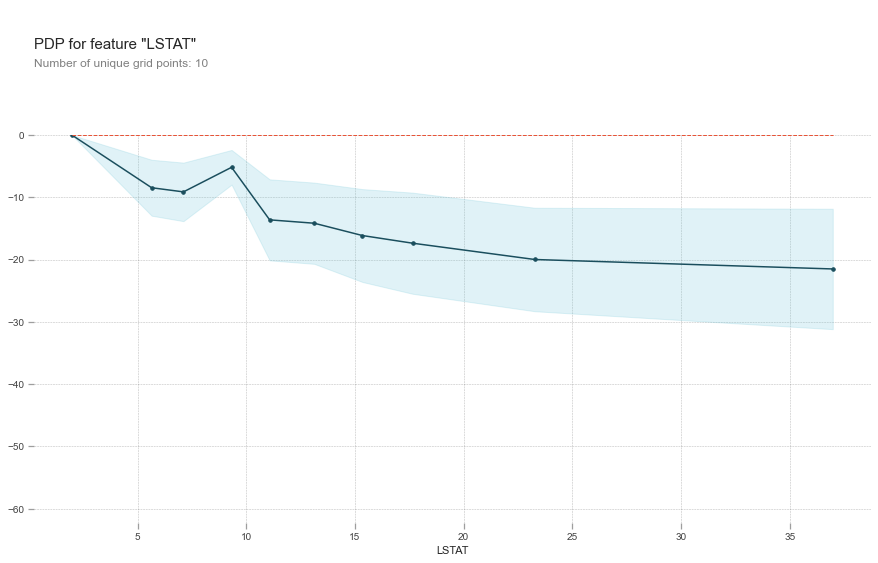

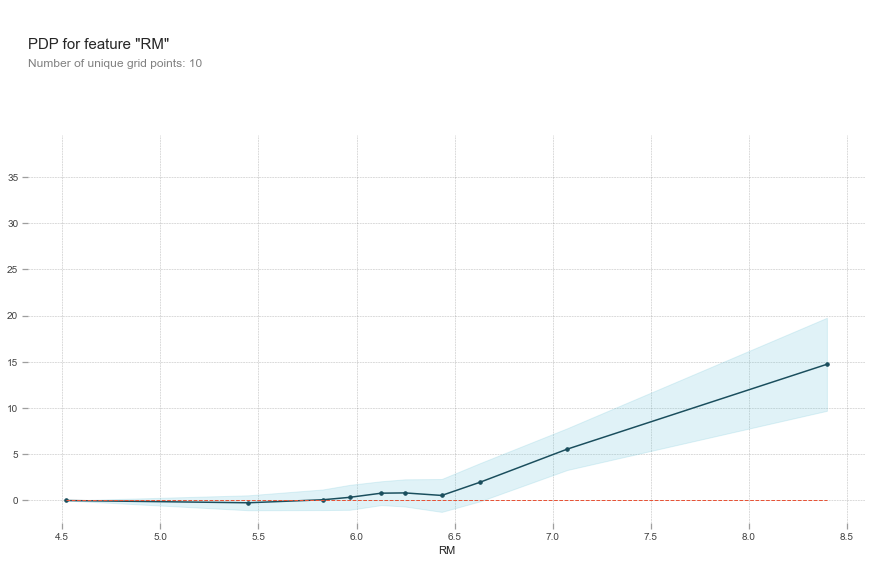

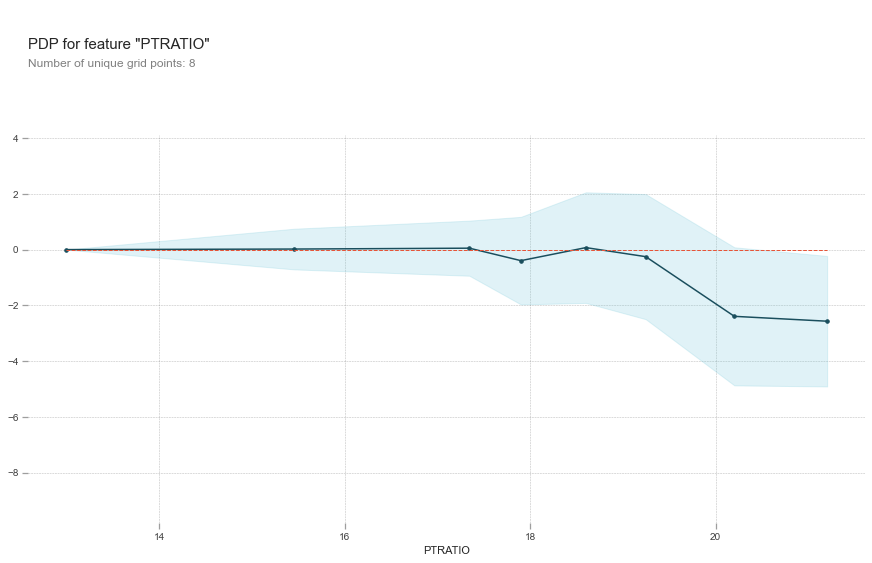

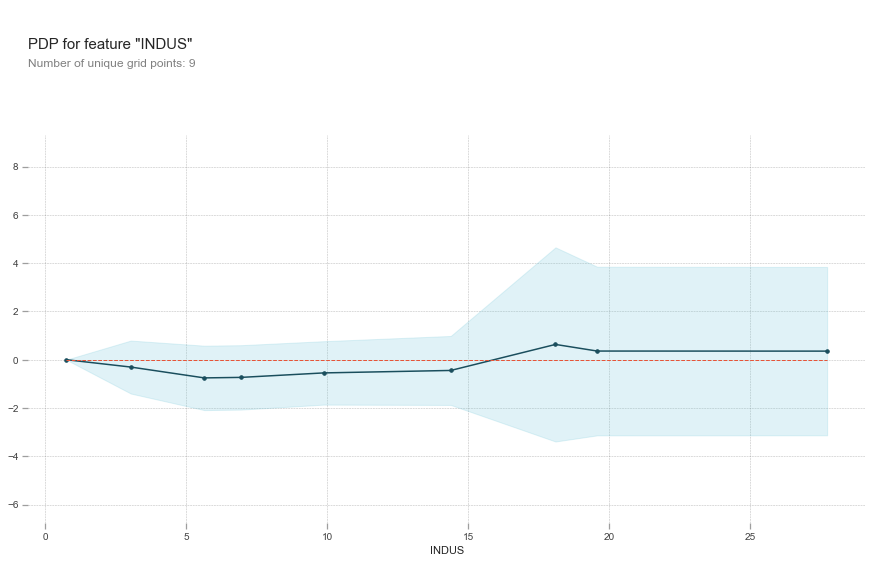

In [14]:
# dependency plot using one feature
for feat in features:
    pdp_feat = pdp.pdp_isolate(model=model,
                              dataset=X_test,
                              model_features=features,
                              feature=feat)
    fig, axes = pdp.pdp_plot(pdp_isolate_out=pdp_feat, feature_name=feat, plot_lines=False)

#### Dependency plot using two features

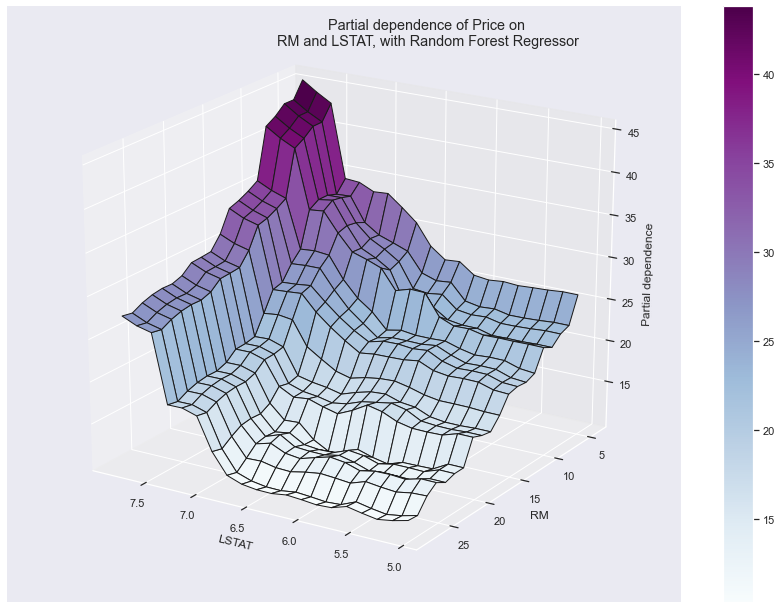

In [15]:
# dependency plot using two features
fig = plt.figure()

# 3-D dependency plot using RM and LSTAT
features_plot = ('RM', 'LSTAT')
pdp, axes = partial_dependence(model, X_test, features=features_plot,
                               grid_resolution=20)
XX, YY = np.meshgrid(axes[0], axes[1])
Z = pdp[0].T
ax = Axes3D(fig)
surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1,
                       cmap=plt.cm.BuPu, edgecolor='k')
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel('Partial dependence')
#  pretty init view
ax.view_init(elev=22, azim=122)
plt.colorbar(surf)
plt.suptitle('Partial dependence of Price on \n'
             'RM and LSTAT, with Random Forest Regressor')
plt.subplots_adjust(top=0.9)

plt.show()

## 8.3 Accumulated Local Effects (ALE) Plot  <a class="anchor" id="section_8_3"></a>

•	Accumulated local effects describe how features influence the prediction of a machine learning model on average. ALE plots are a faster and unbiased alternative to partial dependence plots (PDPs).

•	If features of a machine learning model are correlated, the partial dependence plot cannot be trusted. The computation of a partial dependence plot for a feature that is strongly correlated with other features involves averaging predictions of artificial data instances that are unlikely in reality. This can greatly bias the estimated feature effect.


#### Dependency plot using one feature

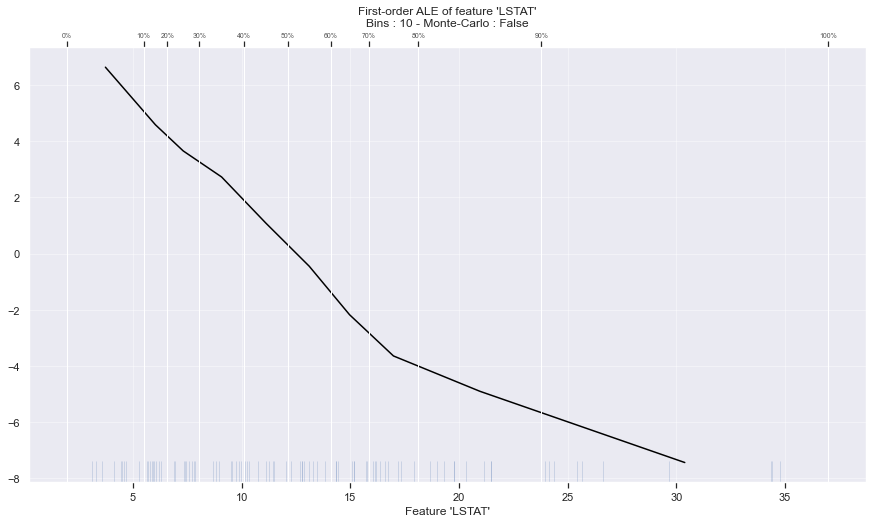

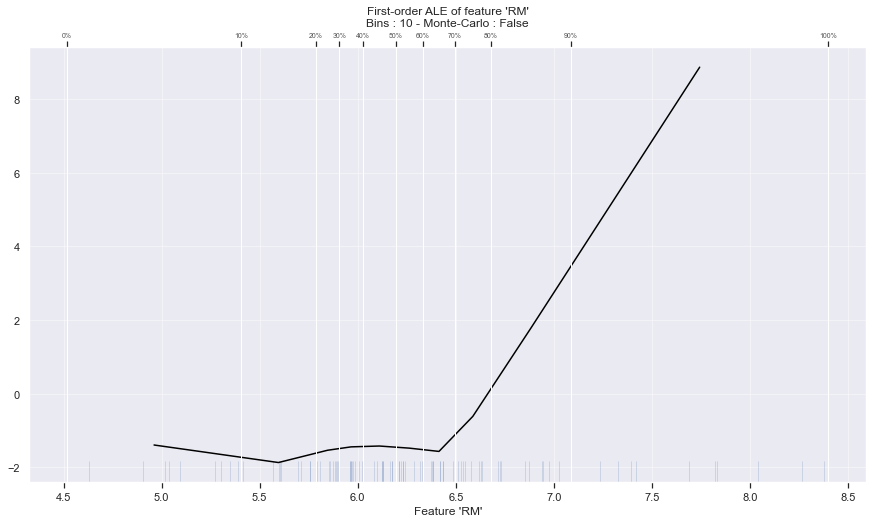

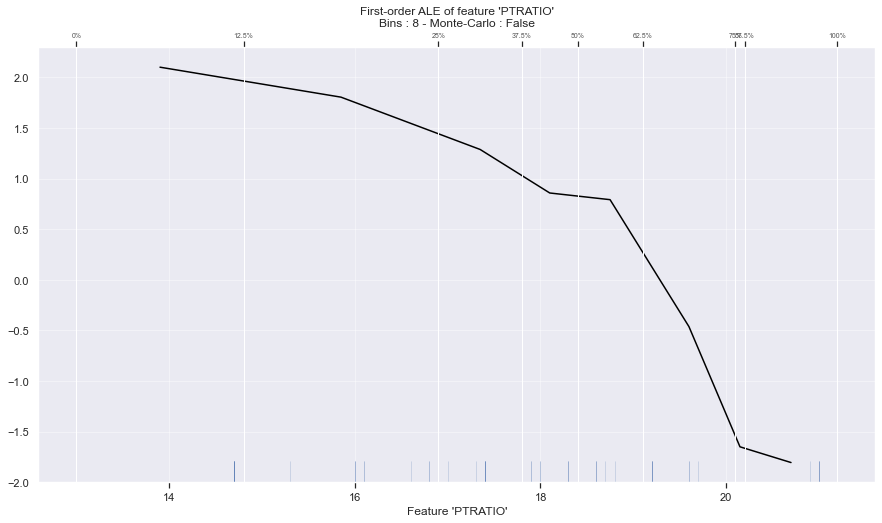

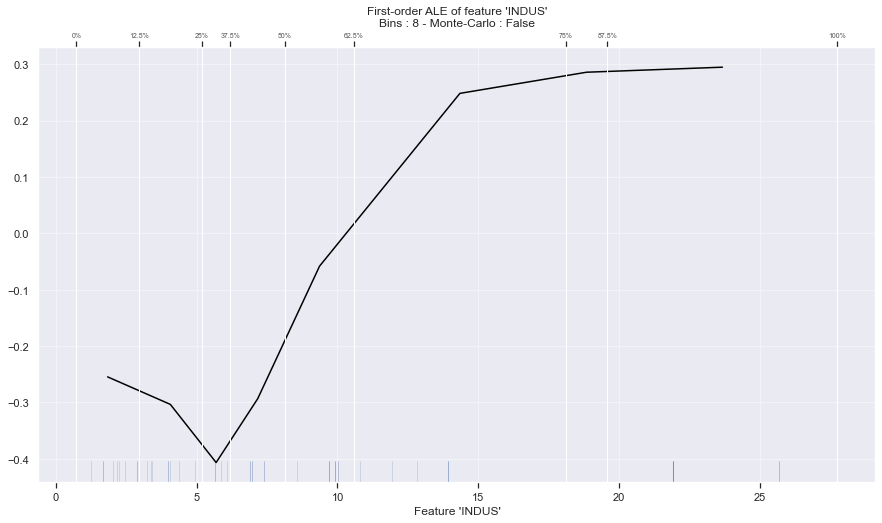

In [16]:
# dependency plot using one feature
for feat in features:
    mpl.rc("figure", figsize=(15, 8))
    ale_plot(model, X_test, feat, monte_carlo=False)

#### Dependency plot using two features

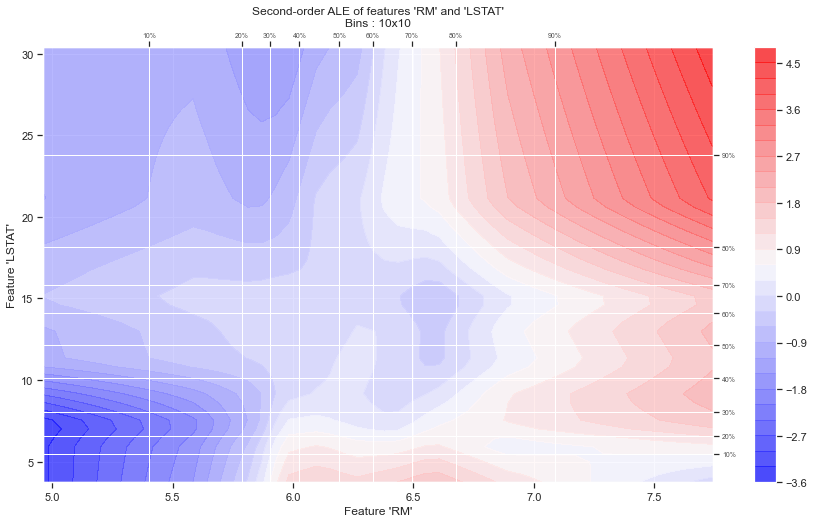

In [17]:
# dependency plot using two features
mpl.rc("figure", figsize=(15, 8));
ale_plot(model, X_test, ['RM', 'LSTAT'], bins=10);

## 8.4 Individual Conditional Expectation (ICE) Plot  <a class="anchor" id="section_8_4"></a>

•	Individual Conditional Expectation (ICE) plots display one line per instance that shows how the instance's prediction changes when a feature changes.

•	The partial dependence plot for the average effect of a feature is a global method because it does not focus on specific instances, but on an overall average. The equivalent to a PDP for individual data instances is called individual conditional expectation (ICE) plot.

•	An ICE plot visualizes the dependence of the prediction on a feature for each instance separately, resulting in one line per instance, compared to one line overall in partial dependence plots. 

•	A PDP is the average of the lines of an ICE plot. The values for a line (and one instance) can be computed by keeping all other features the same, creating variants of this instance by replacing the feature's value with values from a grid and making predictions with the black box model for these newly created instances. 

•	The result is a set of points for an instance with the feature value from the grid and the respective predictions.

•	Here, for each feature we see how the predictions vary and the bold line you see in each graph is the PDP line. So, we can say that PDP plot summarizes an ICE plot


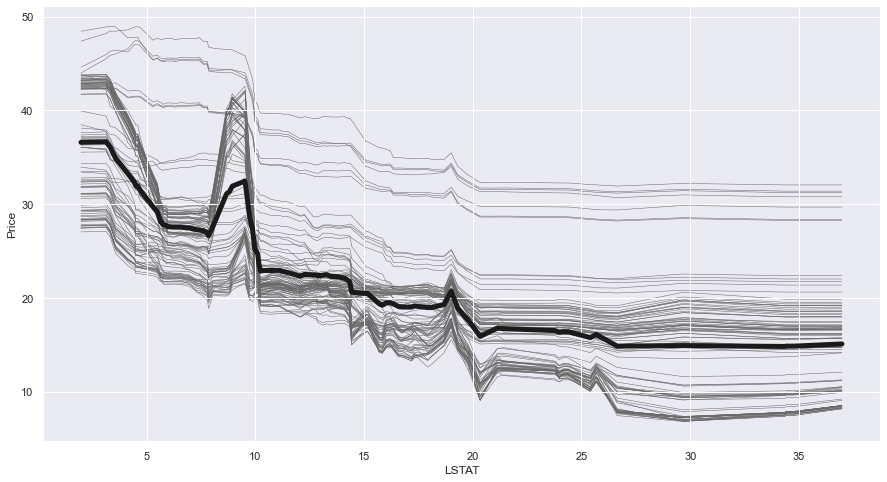

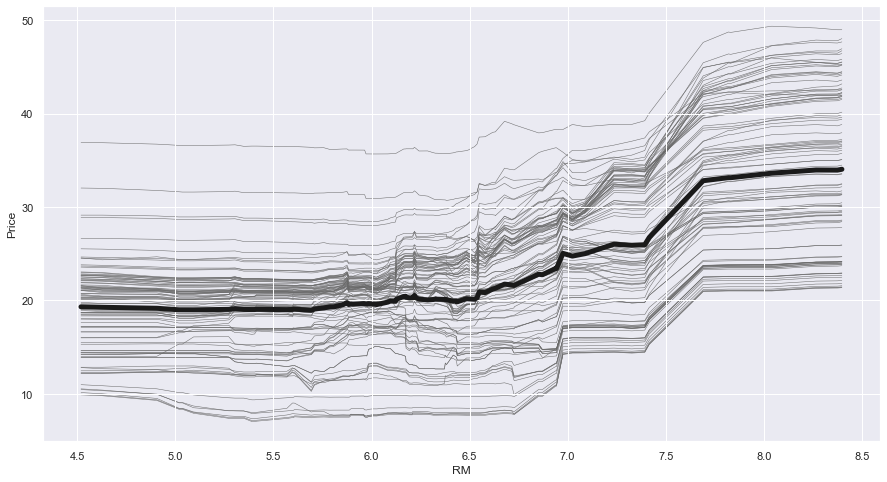

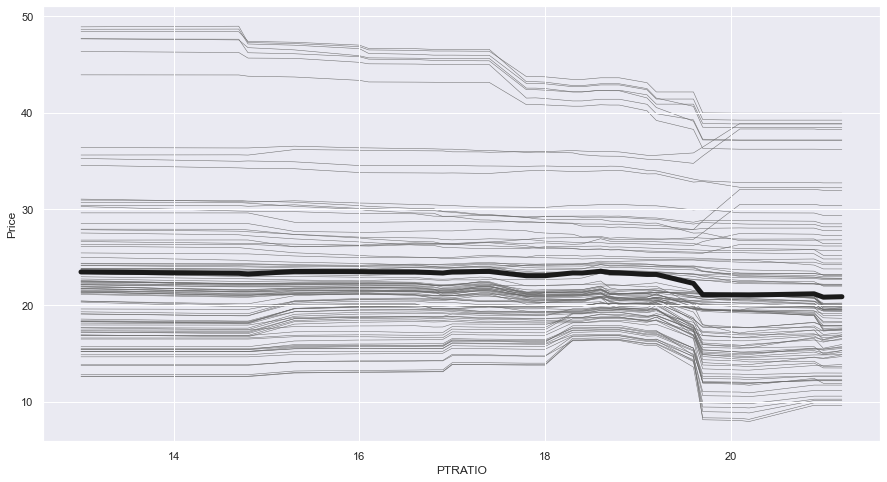

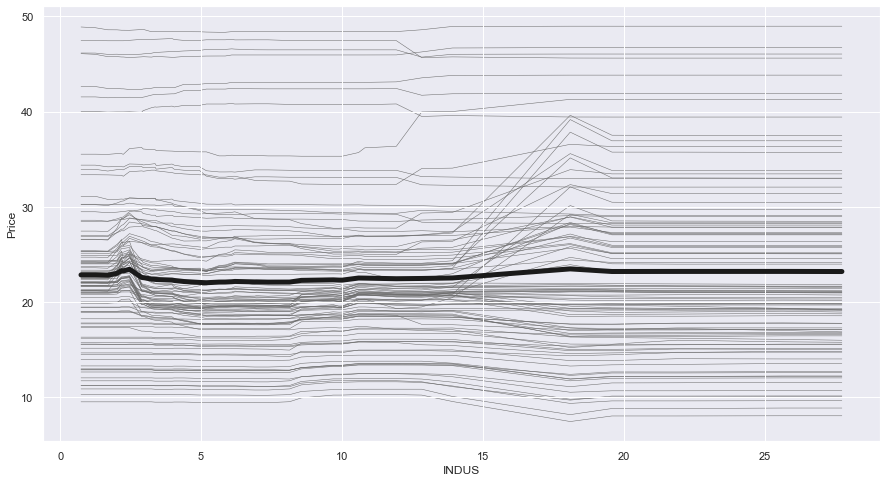

In [18]:
# ICE Plot 
cmap2 = plt.get_cmap('OrRd')
for feat in features:
    ice_df = ice(data=X_test, column=feat, predict=model.predict)

    ice_plot(ice_df, linewidth=.5,cmap=cmap2,c='dimgray', plot_pdp=True, 
         pdp_kwargs={'c': 'k', 'linewidth': 5})
    plt.ylabel('Price')
    plt.xlabel(feat);

## 8.5  Local interpretable model-agnostic explanations (LIME) Plot  <a class="anchor" id="section_8_5"></a>

•	Local surrogate models are interpretable models that are used to explain individual predictions of black box machine learning models.

•	Surrogate models are trained to approximate the predictions of the underlying black box model. Instead of training a global surrogate model, LIME focuses on training local surrogate models to explain individual predictions.

•	Your goal is to understand why the machine learning model made a certain prediction. LIME tests what happens to the predictions when you give variations of your data into the machine learning model. 

•	LIME generates a new dataset consisting of permuted samples and the corresponding predictions of the black box model. On this new dataset LIME then trains an interpretable model, which is weighted by the proximity of the sampled instances to the instance of interest. 

•	The interpretable model can be anything, for example Lasso or a decision tree. The learned model should be a good approximation of the machine learning model predictions locally, but it does not have to be a good global approximation. This kind of accuracy is also called local fidelity.

•	Here we are interpreting the prediction for 35th instance, we can see how each feature has contributed in the prediction. Here, we can also see whether a feature is negatively or positively affecting the model prediction.


In [19]:
#lime plot for 35th instance
explainer = lime.lime_tabular.LimeTabularExplainer(X_test.values, feature_names=features, 
                                                   class_names=['MEDV'],  
                                                   verbose=True, mode='regression')
exp = explainer.explain_instance(X_test.iloc[35], model.predict, num_features=len(features))

exp.show_in_notebook(show_table=True)

Intercept 24.230817484274766
Prediction_local [19.72911806]
Right: 19.691333333333283


# 9. Summary <a class="anchor" id="chapter9"></a>



**1.	SHAP can be used for global as well as local interpretation of models**.

**2.	PDP and ALE can be used as global interpretation techniques. ALE considers correlation among features but, PDP doesn’t.**

**3.	ICE and LIME can be used as local interpretation techniques.**

**4.	By interpreting a machine learning model, we can get the major drivers of the model along with positive and negative drivers of the model.**

**5.	These drivers can be leveraged in making critical business decisions.**


<img src="images/pepe f.jpg" alt="HTML5 Icon" style="width:300px; height:300px; display:block; margin:auto;">

<b><center>"That's all my friend! I hope you found this notebook informative."</center></b>
<b><center>"Bye Bye! "</center></b>